In [3]:
# Eigth time's the charm, right?
import numpy as np

np.printoptions(linewidth=500)

In [54]:
def check_sides(row, dim, thickness):
    uneven = False

    for col in range(0, thickness):
        # Column has voids in protected regions
        if row[col] == 0:
            raise ValueError("WTF")
        
    for col in range(len(row) - thickness, len(row)):
        # Column has voids in right-side protected regions
        if row[col] == 0:
            raise ValueError("WTF")

    # Now check for uneven shapes.
    for i in range(thickness, len(row) - thickness, thickness):
        # Iterate every dim, if there are nonzeros, we know we have a problem.
        if not all(row[i:i+dim]):
            pass


def compute(dim, thickness):
    outputs = []

    newdim = dim - thickness

    cd = 0

    for dd in range(2, 10):
        # Right side thickness
        d = thickness + dd
        A = np.ones((dim, 1), dtype=np.int8)
        for col in range(thickness, newdim):
            if cd < d:
                A[col] = 0
                cd += 1
            else:
                col += thickness
                cd = 0
        outputs.append(A.T)

    return outputs

def compute_positions(dim, thickness):
    newdim = dim - thickness

    A = np.ones((dim, 1), dtype=np.int8)
    for col in range(thickness, newdim, thickness + 1):
        A[col] = 0

    return A.T


In [55]:
A = compute(21, 2)
B = compute_positions(21, 2)

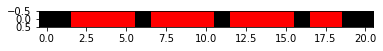

In [56]:
import matplotlib.pyplot as plt
import matplotlib

cmap = matplotlib.colors.ListedColormap(['r', 'k'])
norm = matplotlib.colors.BoundaryNorm([0., 0.5, 1.], cmap.N)

plt.imshow(A[0], cmap=cmap, norm=norm, interpolation='none')

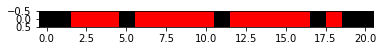

In [57]:
plt.imshow(A[1], cmap=cmap, norm=norm, interpolation='none')

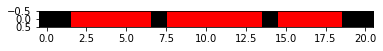

In [58]:
plt.imshow(A[2], cmap=cmap, norm=norm, interpolation='none')

array([[1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1]],
      dtype=int8)

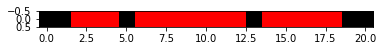

In [59]:
plt.imshow(A[3], cmap=cmap, norm=norm, interpolation='none')
A[3]

array([[1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1]],
      dtype=int8)

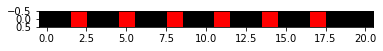

In [60]:
plt.imshow(B, cmap=cmap, norm=norm, interpolation='none')
B